In [ ]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sfp_nsdsyn as sfp
import sfp_nsdsyn.visualization as vis
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

# Load parameter files

In [436]:
results_dir='/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/derivatives/derivatives_HPC/results_2D'
dataset = 'nsdsyn'
stat = 'mean'
full_ver= [True]
sn_list = np.arange(1,9)
lr_rate = [0.0005]
max_epoch = [30000]
roi_list = ['V1','V2','V3']
fig_dir='/Users/jh7685/Dropbox/NYU/Projects/SF/MyResults/2D_tuning_prediction'
sn = 1

In [437]:
all_model_history = sfp.two_dimensional_model.load_history_df_subj(results_dir, dataset, stat, full_ver, sn_list, lr_rate, max_epoch, 'model', ['V1'])
final_params = all_model_history.query('epoch == 29999')

 ## melt final_params variable

In [260]:
params =['sigma','slope','intercept','p_1','p_2','p_3','p_4','A_1','A_2']
group = [1,2,2,3,3,3,3,3,3]

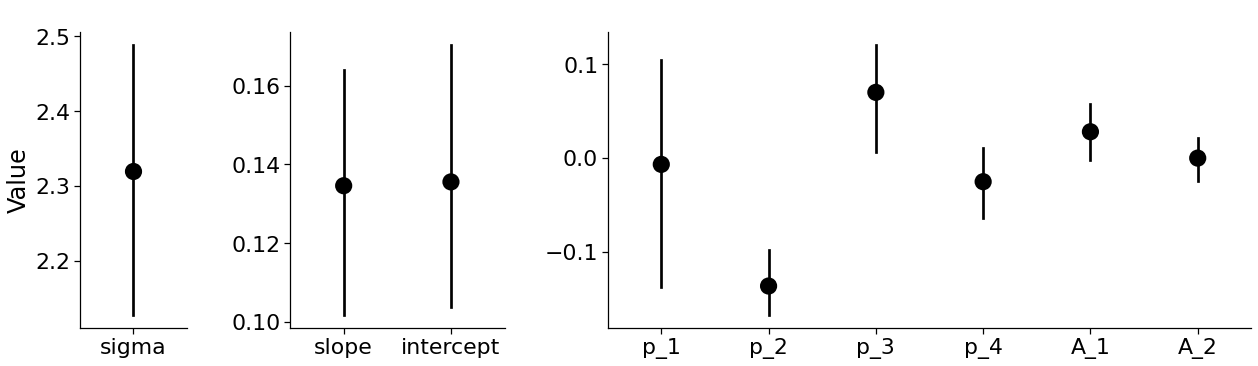

In [261]:
grid = vis.plot_2D_model_results.plot_avg_parameters(final_params, params, group)

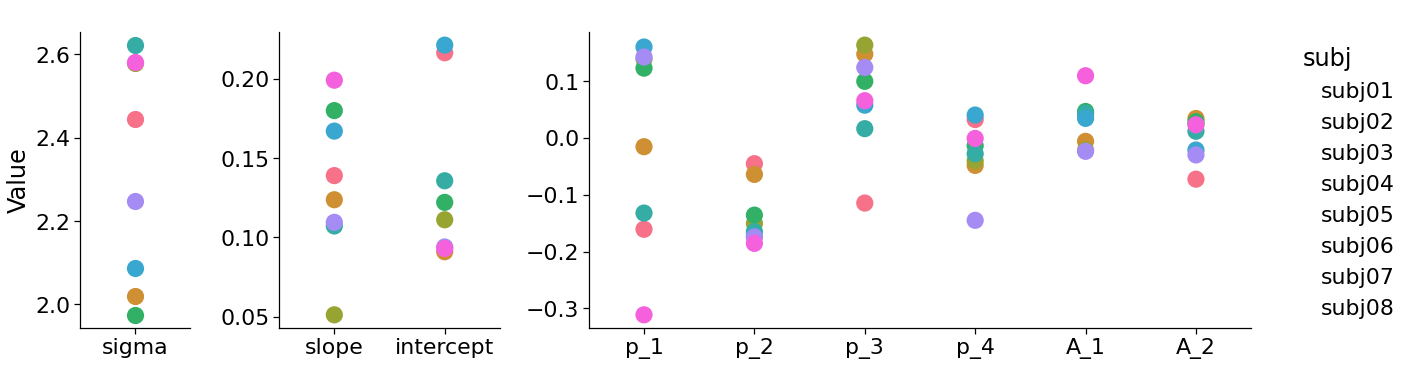

In [263]:
vis.plot_2D_model_results.plot_individual_parameters(final_params, params, group)

# Preferred period plots (lineplot, polar plot)
## Shape data - we now need to calculate predicted preferred period (deg).
1. Load in final parameter information (slope $a$, intercept $b$)
2. we load in each stimulus information (stim orientation $\theta_l$) ....???
3. Make continuous eccentricity $r_v$ df
4. Make continuous angle $\theta_v$ df
5. Merge everything (1,2,3,&4)
6. Plug in those value to make $P_v$
7. make a figure for preferred period vs. eccentricity


## Play with the effect of averaging orientation & angle on Pv values

In [281]:
np.cos()

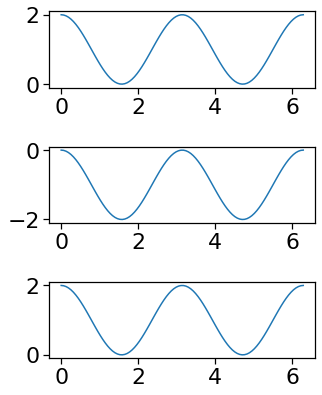

In [301]:
def get_Pv(ori, angle):
    formula = np.cos(2*ori) + np.cos(4*angle)
    return formula

ori = np.linspace(0,2*np.pi, 100)
# When angle == 0, we are adding a constant np.cos(4*0) which is 1. That will make the formula value maximum. On the other hand, when angle == 1/4*(np.pi), we are adding the smallest constant possible, which is np.cos(4*(1/4)*np.pi) == -1. This will make the value minimum.
angle_list = [0, 45, 90]
fig, axes = plt.subplots(len(angle_list), 1, figsize=(5,6))
for i, angle in enumerate(angle_list):
    axes[i].plot(ori, get_Pv(ori, np.deg2rad(angle)))
plt.tight_layout()

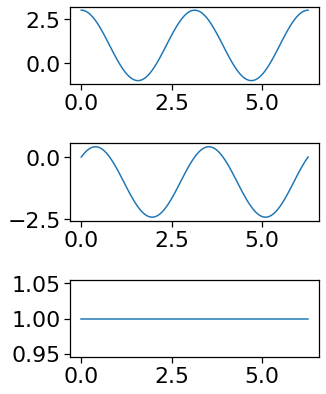

In [304]:
def get_Pv(ori, angle):
    formula = np.cos(2*ori) + np.cos(4*angle) + np.cos(2*(angle - ori))
    return formula

ori = np.linspace(0,2*np.pi, 100)
# When angle == 0, we are adding a constant np.cos(4*0) which is 1. That will make the formula value maximum. On the other hand, when angle == 1/4*(np.pi), we are adding the smallest constant possible, which is np.cos(4*(1/4)*np.pi) == -1. This will make the value minimum.
angle_list = [0, 45, 90]
fig, axes = plt.subplots(len(angle_list), 1, figsize=(5,6))
for i, angle in enumerate(angle_list):
    axes[i].plot(ori, get_Pv(ori, np.deg2rad(angle)))
plt.tight_layout()

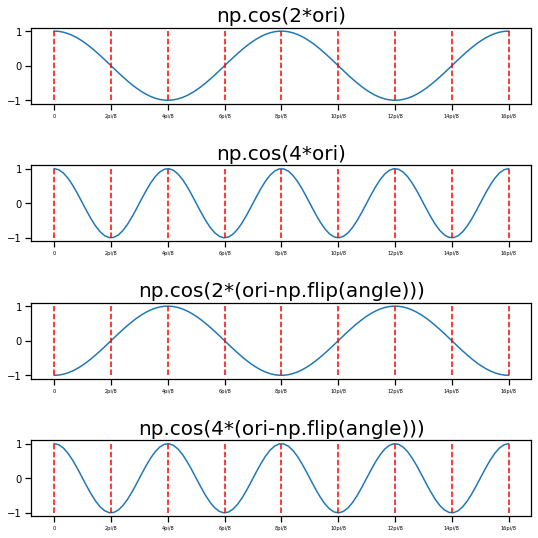

In [353]:
ori = np.linspace(0,2*np.pi, 100)
angle = np.linspace(0,2*np.pi, 100)
value = [2*ori, 4*angle, 2*(ori-np.deg2rad(90)), 4*(ori-np.deg2rad(90))]
title_list = ['2*ori', '4*ori', '2*(ori-np.flip(angle))', '4*(ori-np.flip(angle))']

fig, axes = plt.subplots(4, 1, figsize=(8,8))
plt.rc('ytick', labelsize=10)
plt.rc('axes', titlesize=20, labelsize=20)
for i, val in enumerate(value):
    axes[i].plot(ori, np.cos(val))
    axes[i].set_title(f'np.cos({title_list[i]})')
    axes[i].vlines(x=np.linspace(0,2*np.pi, 9), ymin=-1, ymax=1, color='r', ls='--')
    #axes[i].set_xlim((0,2*np.pi))
    axes[i].set_xticks(np.linspace(0,2*np.pi, 9), ['0', '2pi/8', '4pi/8','6pi/8','8pi/8','10pi/8','12pi/8','14pi/8','16pi/8'])
fig.tight_layout()

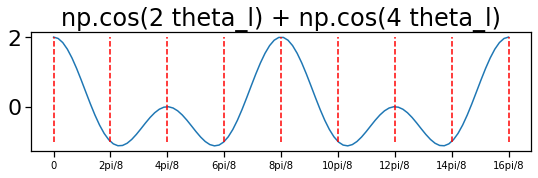

In [412]:
ori = np.linspace(0,2*np.pi, 1001)
fig, axes = plt.subplots(1,1, figsize=(8,3))
axes.plot(ori, np.cos(2*ori)+np.cos(4*ori))
axes.set_title(f'np.cos(2 theta_l) + np.cos(4 theta_l)')
axes.vlines(x=np.linspace(0,2*np.pi, 9), ymin=-1, ymax=2, color='r', ls='--')
axes.set_xticks(np.linspace(0,2*np.pi, 9), ['0', '2pi/8', '4pi/8','6pi/8','8pi/8','10pi/8','12pi/8','14pi/8','16pi/8'], fontsize=10)

fig.tight_layout()

In [418]:
ori = np.linspace(0,2*np.pi, 1001)
sum_of_two_cos = np.cos(2*ori)+np.cos(4*ori)
sum_of_two_cos_half = np.cos(2*ori[:len(ori)//2])+np.cos(4*ori[:len(ori)//2])
sum_of_two_cos_quarter = np.cos(2*ori[:len(ori)//4])+np.cos(4*ori[:len(ori)//4])
mean_theta_ls = np.mean(sum_of_two_cos)
mean_theta_ls_half = np.mean(sum_of_two_cos_half)
mean_theta_ls_quarter = np.mean(sum_of_two_cos_quarter)

print(np.round(mean_theta_ls,3))
print(np.round(mean_theta_ls_half,3))
print(np.round(mean_theta_ls_quarter,3))

four_equally_spaced_values = np.linspace(0,0.5*np.pi, 4, endpoint=False)
sum_of_four_cos = np.cos(2*four_equally_spaced_values) + np.cos(4*four_equally_spaced_values)
mean_four_theta_ls = np.mean(sum_of_four_cos)
print(np.round(mean_four_theta_ls,3))

0.002
0.0
0.004
0.25


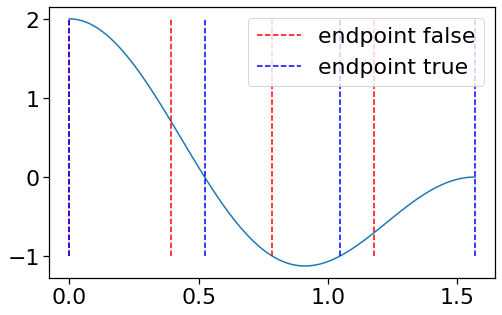

In [428]:
np.linspace(0,0.5*np.pi, 4, endpoint=False)/np.pi
np.linspace(0,0.5*np.pi, 4)/np.pi

fig, axes = plt.subplots(1,1, figsize=(8,5))
axes.plot(np.linspace(0,0.5*np.pi, 100), np.cos(2*np.linspace(0,0.5*np.pi, 100))+np.cos(4*np.linspace(0,0.5*np.pi, 100)))
axes.vlines(x=np.linspace(0,0.5*np.pi, 4, endpoint=False), ymin=-1, ymax=2, color='r', ls='--', label="endpoint false")
axes.vlines(x=np.linspace(0,0.5*np.pi, 4), ymin=-1, ymax=2, color='b', ls='--', label="endpoint true")
plt.legend(loc="best")

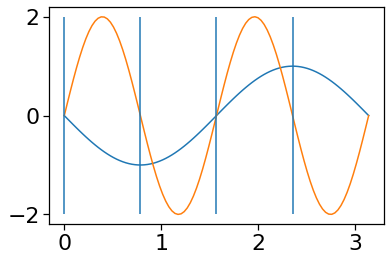

In [434]:
ori_range = np.linspace(0, np.pi, 100)

fig, axes = plt.subplots(1,1)
axes.plot(ori_range, -np.sin(2*ori_range), label='2*ori range')
axes.plot(ori_range, np.sin(4*ori_range)*2, label='4*ori_range')
axes.vlines([0, np.pi/4, np.pi/2, 3*np.pi/4], -2, 2)


In [264]:
roi='V1'
subj_df = sfp.utils.load_df(sn, df_dir=f'/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/{dataset}', df_name=f'stim_voxel_info_df_vs-pRFsigma_{roi}_{stat}.csv', dataset=dataset)
subj_df.head()
print(subj_df.angle.min(), subj_df.angle.max())

0.0015421653268997 6.28249448319282


### 2. Load in stim_info

In [375]:
stim_info = pd.read_csv('/Volumes/server/Projects/sfp_nsd/natural-scenes-dataset/nsdsynthetic_sf_stim_description.csv')
stim_info = stim_info[['names','names_idx','w_r','w_a','phase','class_idx','freq_lvl']]
stim_info = stim_info.drop_duplicates(subset=stim_info.drop(columns='phase').columns.tolist())
stim_info.head()

,names,names_idx,w_r,w_a,phase,class_idx,freq_lvl
0,pinwheel,0,0.0,6.0,0.0,0,0
4,pinwheel,0,0.0,11.0,0.0,1,1
8,pinwheel,0,0.0,20.0,0.0,2,2
12,pinwheel,0,0.0,37.0,0.0,3,3
16,pinwheel,0,0.0,69.0,0.0,4,4


### 3. Make continuous eccentricity df


In [377]:
subj_df = final_params.query('subj == "subj01"')
all_ecc_final_params = vis.plot_2D_model_results.merge_continuous_eccentricity(stim_info, ecc_range=(0,5), repeat=100, col_name='eccentricity')
all_ecc_final_params.shape

(2800, 8)

### 4. Make continuous angle df


In [378]:
all_angle_final_params = vis.plot_2D_model_results.merge_continuous_eccentricity(all_ecc_final_params, ecc_range=(0,np.pi*2), repeat=100, col_name='angle')
all_angle_final_params.shape

(280000, 9)

### Make continuous stim orientation df
This can be made based on the eccentricity and w_a & w_r.

In [380]:
all_ori_final_params = sfp.preprocessing._calculate_local_orientation(all_angle_final_params)
all_ori_final_params.head()

,names,names_idx,w_r,w_a,phase,class_idx,freq_lvl,eccentricity,angle,local_ori
0,pinwheel,0,0.0,6.0,0.0,0,0,0.0,0.0,1.570796
1,pinwheel,0,0.0,11.0,0.0,1,1,0.0,0.0,1.570796
2,pinwheel,0,0.0,20.0,0.0,2,2,0.0,0.0,1.570796
3,pinwheel,0,0.0,37.0,0.0,3,3,0.0,0.0,1.570796
4,pinwheel,0,0.0,69.0,0.0,4,4,0.0,0.0,1.570796


### Merge model parameters to the synthetic local_ori, ecc, & angle df

### Calculate preferred period for all possible combinations

In [363]:
all_ori_final_params['Pv'] = all_ori_final_params.apply(lambda row: sfp.two_dimensional_model.get_Pv(row, full_ver=True), axis=1)

In [365]:
all_ori_final_params[['eccentricity','angle','ori','Pv']].head()

,eccentricity,angle,ori,Pv
0,0.000000,0.0,0.0,0.153992
1,0.050505,0.0,0.0,0.158986
2,0.101010,0.0,0.0,0.163980
3,0.151515,0.0,0.0,0.168975
4,0.202020,0.0,0.0,0.173969


<AxesSubplot:xlabel='eccentricity', ylabel='Pv'>

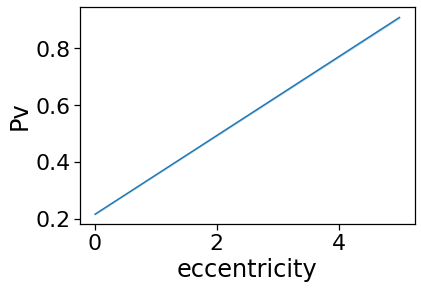

In [374]:
sns.lineplot(data=all_ori_final_params, x='eccentricity', y='Pv', err_style='band')